In [1]:
import os
import sys
import math
import numpy as np
import pandas as pd
import csv 
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator,FormatStrFormatter
% matplotlib inline

In [40]:
df = pd.read_csv('alter_overlap.csv', encoding='utf_8_sig')
# df = df[0:1000]

In [41]:
df.shape

(75446, 3)

In [42]:
df

,contact,userid,re_user
0,1.0,0.0,--Kimci-
1,1.0,0.0,-3-圆园圆园子
2,2.0,0.0,-CCW-
3,6.0,0.0,-Fashionbaby
4,1.0,0.0,-__LuaLu__-
5,8.0,0.0,-___Candice___-
6,1.0,0.0,-九尾狐小姐
7,1.0,0.0,-土豆坨坨
8,1.0,0.0,-阿sa哥
9,1.0,0.0,-首长


In [44]:
putong_wanghong_dict = {}
re_user_list = list(set(df['re_user'].tolist()))

for re_user in re_user_list:
    putong_wanghong_dict[re_user] = []

user_id_set = list(set(df['userid'].tolist()))

for re_user in re_user_list:
    tmp = df[df['re_user'] == re_user] 
    if len(tmp) == 0:
        continue
    else:
        for user_id in user_id_set:
            tmp_tmp = tmp[tmp['userid']==user_id]
#             print(user_id)
            if len(tmp_tmp)!=0:
#                 print(user_id)
                putong_wanghong_dict[re_user].append(int(user_id)) 


In [51]:
key_list = list(putong_wanghong_dict.keys())
key_list

['rrrrrrrudeman',
 '轻氧燕窝白藜芦醇股东sophie',
 '我是猪排妹',
 'LILICHONG-',
 'Quxiaoxiao--',
 '再瘦15斤肉',
 'IMFIONABABY',
 '西麦MAI',
 '退步之星',
 'Chatime_Arcadia日出茶太',
 '田幂',
 'xixi小茜子',
 '方王木木姑娘',
 '萝卜-IVF-ICSI',
 '爱吃猫的鱼鱼鱼鱼儿',
 'Chowwwwwww7',
 '宣克炅',
 '为了回血的大白菜闲置',
 '萍萍爱叮当',
 '我是你華姥姥',
 '刘同',
 '妖妖妹纸_匕禾页',
 '蒋小歡',
 '瑞贝卡时尚假发',
 'tina_oneday',
 '彭昱畅',
 'sheryarr',
 '央央叔叔',
 'Finelycup梵妳_moe_cry萌萌',
 'Clyim颖',
 'AugustO_o',
 '贵芸芸儿',
 '粘粘I',
 '沉默的小狮子82475',
 '自在多难得',
 '霌同学',
 '赵颖爱购物',
 'A_Hyun',
 '想要变成小太阳的99',
 '1米55老少女',
 '优秀的大腚',
 'keko_大可',
 '第三只小鱼',
 '耐耐TONG',
 'S--Xing萌',
 '调色教室',
 'SCC鹏鹏',
 'X-Jelly',
 '大大睡好觉',
 '插电不二',
 'Queen阿',
 '天天美食推荐',
 'TTT_ina',
 '周天慈_Alien',
 '行周末',
 '你挡到我发光了了了',
 '__段倪尚',
 '請叫我阿聰哥Cici',
 '停不下的剁手烧钱嘤嘤嘤',
 '郑吃吃North',
 '家猪野猪反正都是我的猪',
 '_两只羊_',
 'z婧_小代购',
 '梦梦啊__',
 '尘缘情话',
 '梓涵的梓涵',
 '婷婷不是叮叮',
 'Hellove1106',
 '皇上您吃锅巴吗',
 'fifi的任意门',
 '喀喀喀次',
 '张馨心KaiSsu',
 'Focushung',
 '欣大__',
 '谢阿荣Tse',
 '最萌小树莓',
 'L-Caroline煜旻',
 '我的头像最好看哈哈哈',
 '爱玩的茹茹',
 '小鸡丁-Sally',
 '嗨脸白白厶小中分头',
 'pozic'

In [52]:
name = []
values = []
for key in key_list:
    name.append(key)
    values.append(putong_wanghong_dict[key])

In [55]:
result = pd.DataFrame({'name':name,'value':values})

In [58]:
result['length'] = result['value'].map(lambda x: len(x))

In [15]:
df1 = df1.sort(['contact'])


,﻿re_user,contact,userid
0,#NAME?,1,1
12591,Sy-October,1,1
12593,Sybil_Jia,1,1
12594,Sydney_li,1,1
12595,Syeyeyeye,1,1
12596,Syl_Zhang,1,1
12597,Sylv1a·san,1,1
12598,Sylvia-秘密花园,1,1
12599,SylviaSXX,1,1
12600,Sylvia_Fairy_,1,1


In [2]:
result = pd.read_csv('overlap_result.csv', encoding='utf8')
result         

,name,value,length
0,Dipsy迪西,"[0, 1, 2, 3, 4, 5, 6, 8, 11, 12, 13, 14, 15, 1...",69
1,新浪娱乐,"[0, 1, 2, 3, 4, 8, 9, 11, 13, 14, 15, 16, 17, ...",63
2,人民日报,"[0, 3, 6, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19...",54
3,央视新闻,"[0, 1, 2, 8, 9, 12, 13, 14, 15, 17, 19, 28, 29...",52
4,思想聚焦,"[0, 4, 6, 9, 12, 13, 16, 17, 21, 22, 23, 25, 2...",51
5,当时我就震惊了,"[2, 6, 8, 9, 11, 12, 16, 17, 21, 30, 31, 33, 3...",49
6,冷笑话精选,"[0, 1, 4, 8, 12, 16, 17, 19, 21, 25, 30, 33, 4...",45
7,-Fashionbaby,"[0, 2, 3, 4, 6, 11, 13, 15, 17, 19, 20, 21, 24...",44
8,gogoboi,"[0, 2, 3, 4, 6, 7, 10, 13, 14, 15, 16, 17, 23,...",41
9,全球时尚,"[0, 1, 2, 4, 5, 8, 12, 16, 17, 21, 25, 30, 33,...",39


In [12]:
result.describe()     

,length
count,56459.000000
mean,1.336297
std,1.579989
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,69.000000


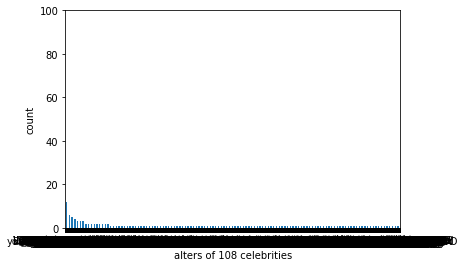

In [3]:
x = range(1,56460)
y = result['length'].tolist()
x_ = list(result['name'])
plt.xlabel('alters of 108 celebrities')  
plt.ylabel('count')  
width=0.5
plt.bar(x,y,width=width)
plt.xlim(0,56460)
plt.ylim(0,100)
ymajorLocator = MultipleLocator(1)
plt.xticks(x,x_)
plt.show()

In [5]:
single = len(result[result['length']<2])
single

48863

In [7]:
multi = len(result[result['length']>1])
multi

7596

In [23]:
multi_2_5 = len(result[(result['length']>1) & (result['length']<6)])
multi_2_5

6679

In [24]:
multi_6_ = len(result[result['length']>5])
multi_6_

917

In [3]:
result_multi2 = result[(result['length']>1) & (result['length']<5)]
result_multi2.to_csv('result_multi2.csv',index=False,encoding= 'utf-8-sig')
result_multi2

,name,value,length
1245,美拍,"[0, 52, 61, 105]",4
1246,关注旅行,"[16, 36, 49, 70]",4
1247,八卦台湾,"[17, 36, 67, 82]",4
1248,时尚人必跟微博,"[4, 19, 25, 67]",4
1249,小颗粒Lily,"[21, 69, 89, 104]",4
1250,小艺酱-Yii,"[4, 11, 102, 104]",4
1251,DC大叔,"[23, 29, 36, 43]",4
1252,yaqi_qqqq,"[6, 7, 16, 19]",4
1253,我说这是个神贴,"[11, 40, 49, 82]",4
1254,咦是小吕啊,"[4, 6, 9, 56]",4


In [4]:
result_multi2['value'] = result_multi2['value'].map(lambda x: eval(x))
value_list = result_multi2['value'].tolist()
result_list = []

for ele in value_list:
    for element in ele:
        result_list.append(element)

result_set = list(set(result_list))

result_dic = {}
for ele in result_set:
    result_dic[ele] = result_list.count(ele)
    
cele = []
count = []
for key in result_dic:
    cele.append(key)
    count.append(result_dic[key])

multi2_cele = pd.DataFrame({'celebrity':cele,'count':count})
multi2_cele

c:\users\yee shen\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,celebrity,count
0,0,152
1,1,200
2,2,260
3,3,542
4,4,331
5,5,131
6,6,417
7,7,299
8,8,156
9,9,59


In [20]:
multi2_cele.to_csv('multi2_count.csv',index=False)

In [5]:
multi2_cele = multi2_cele.sort_values(['count'],ascending = False)
multi2_cele

,celebrity,count
19,19,728
17,17,680
3,3,542
6,6,417
104,104,402
48,48,386
43,43,367
11,11,362
33,33,346
4,4,331


In [6]:
multi2_cele.to_csv('multi2_cele.csv',index=False)

In [7]:
cele_list = pd.read_excel('电商网红名单.xlsx',encoding = 'utf8')
cele_list

,celebrity,weibo_id,weibo_link,taobao_link
0,0,ALU_U,https://weibo.com/alu13?profile_ftype=1&is_all...,https://alu13.taobao.com/index.htm
1,1,Lin张林超,https://weibo.com/lin828?profile_ftype=1&is_al...,https://lin828.taobao.com/
2,2,AM__FASHION,https://weibo.com/masamizhang?refer_flag=10010...,https://next-in-fashion.taobao.com/
3,3,MALInv,https://weibo.com/malimta?profile_ftype=1&is_a...,https://mtastudios.taobao.com/
4,4,Tikilee,https://weibo.com/tikilee?profile_ftype=1&is_a...,https://tkstyle.taobao.com/
5,5,yeswomen小宜,https://weibo.com/yeswomen2010yi?profile_ftype...,https://yeswomen2010.taobao.com/
6,6,ZY喜哥,https://weibo.com/czyup?profile_ftype=1&is_all...,https://zystudiozy.taobao.com/
7,7,阿希哥VCRUAN,https://weibo.com/u/1746841372?refer_flag=1001...,https://vcruanruanvc.taobao.com/
8,8,狼宝-LangBoom,https://weibo.com/langbaoyes?profile_ftype=1&i...,https://langlangyes.taobao.com/
9,9,林珊珊_Sunny,https://weibo.com/SuperMan033?profile_ftype=1&...,https://superman33.taobao.com/


In [8]:
merge_multi2 = pd.merge(multi2_cele,cele_list,how='left')
merge_multi2                        

,celebrity,count,weibo_id,weibo_link,taobao_link
0,19,728,onlyanna,https://weibo.com/u/1736315592?refer_flag=1001...,https://onlyanna.taobao.com/
1,17,680,张大奕eve,https://weibo.com/zhangyieve?profile_ftype=1&i...,https://bigeve8.taobao.com/
2,3,542,MALInv,https://weibo.com/malimta?profile_ftype=1&is_a...,https://mtastudios.taobao.com/
3,6,417,ZY喜哥,https://weibo.com/czyup?profile_ftype=1&is_all...,https://zystudiozy.taobao.com/
4,104,402,周小熊大人,https://weibo.com/ttjiayougo?profile_ftype=1&i...,https://zhouxiaoxiong.taobao.com/
5,48,386,seina施依娜,https://weibo.com/seina1204?profile_ftype=1&is...,https://deessefashion.taobao.com/
6,43,367,Mr九九_s,https://weibo.com/mrjiujiudesign?profile_ftype...,https://mrjiujiu.taobao.com/
7,11,362,美美de夏夏啊,https://weibo.com/pokalovexiaxia?profile_ftype...,https://h-xiaxia.taobao.com/
8,33,346,FEERIQUE_梵莉可,https://weibo.com/vangeline?profile_ftype=1&is...,https://feerique.taobao.com/
9,4,331,Tikilee,https://weibo.com/tikilee?profile_ftype=1&is_a...,https://tkstyle.taobao.com/


In [11]:
features = pd.read_csv('features_lable_network1.csv',encoding = 'utf8')
features

,celebrity,userid,follow,fans,original_weibo,repost_weibo,like_weibo,av_comment,av_like,av_re_comment,...,label,count,count2,count3,count_sum,perc1,perc2,perc3,fans_trans,quchuhou_len
0,0,1,316,3775598,2834,679,1343,703.142214,1150.808223,3551.350806,...,1,152,74,76,302,0.503,0.245,0.252,1.430151,17
1,2,3,393,4348114,4082,1164,1062,83.097712,396.988982,1060.471216,...,2,260,108,69,437,0.595,0.247,0.158,2.978160,4
2,4,5,751,778999,4050,2285,538,9.862074,248.611844,114.159870,...,3,331,164,95,590,0.561,0.278,0.161,0.244200,6
3,5,6,334,1241240,1351,766,262,257.978234,2177.106605,370.986234,...,3,131,115,51,297,0.441,0.387,0.172,0.263533,6
4,6,7,701,2498820,3772,1145,1917,733.688423,996.604790,1113.772453,...,2,417,172,112,701,0.595,0.245,0.160,1.081740,9
5,7,8,442,3270155,2457,1126,696,221.039438,460.953958,234.175818,...,3,299,148,77,524,0.571,0.282,0.147,0.786095,17
6,8,9,759,2295703,3605,1438,120,117.579598,262.434421,334.918314,...,2,156,34,35,225,0.693,0.151,0.156,1.929162,1
7,9,10,181,5733434,2199,211,272,3142.379453,7556.855960,2279.682713,...,3,59,31,23,113,0.522,0.274,0.204,0.830932,6
8,11,12,475,3956210,1369,515,2318,1831.429379,865.555727,2986.545552,...,2,362,180,113,655,0.553,0.275,0.173,0.873336,9
9,12,13,202,6738735,2025,477,928,188.166470,988.913420,1336.992481,...,2,189,119,102,410,0.461,0.290,0.249,2.642641,12


In [12]:
fans_lable = features[['celebrity','fans','label']]
fans_lable

,celebrity,fans,label
0,0,3775598,1
1,2,4348114,2
2,4,778999,3
3,5,1241240,3
4,6,2498820,2
5,7,3270155,3
6,8,2295703,2
7,9,5733434,3
8,11,3956210,2
9,12,6738735,2


In [71]:
#fans_lable = fans_lable.rename(columns={'id': 'celebrity'}) 
#fans_lable

In [8]:
fans_lable = fans_lable.sort_values(['fans'],ascending = False)
fans_lable.groupby('label').count()

,celebrity,fans
label,,
1,29,29
2,41,41
3,14,14


In [13]:
merge_multi2_features = pd.merge(merge_multi2,fans_lable,how='left',on='celebrity')
merge_multi2_features

,celebrity,count,weibo_id,weibo_link,taobao_link,fans,label
0,19,728,onlyanna,https://weibo.com/u/1736315592?refer_flag=1001...,https://onlyanna.taobao.com/,2203402.0,3.0
1,17,680,张大奕eve,https://weibo.com/zhangyieve?profile_ftype=1&i...,https://bigeve8.taobao.com/,5873421.0,3.0
2,3,542,MALInv,https://weibo.com/malimta?profile_ftype=1&is_a...,https://mtastudios.taobao.com/,NaN,NaN
3,6,417,ZY喜哥,https://weibo.com/czyup?profile_ftype=1&is_all...,https://zystudiozy.taobao.com/,2498820.0,2.0
4,104,402,周小熊大人,https://weibo.com/ttjiayougo?profile_ftype=1&i...,https://zhouxiaoxiong.taobao.com/,676226.0,2.0
5,48,386,seina施依娜,https://weibo.com/seina1204?profile_ftype=1&is...,https://deessefashion.taobao.com/,836399.0,2.0
6,43,367,Mr九九_s,https://weibo.com/mrjiujiudesign?profile_ftype...,https://mrjiujiu.taobao.com/,339578.0,2.0
7,11,362,美美de夏夏啊,https://weibo.com/pokalovexiaxia?profile_ftype...,https://h-xiaxia.taobao.com/,3956210.0,2.0
8,33,346,FEERIQUE_梵莉可,https://weibo.com/vangeline?profile_ftype=1&is...,https://feerique.taobao.com/,53265.0,1.0
9,4,331,Tikilee,https://weibo.com/tikilee?profile_ftype=1&is_a...,https://tkstyle.taobao.com/,778999.0,3.0


In [14]:
merge2 = merge_multi2_features[merge_multi2_features['label'].notnull()]
merge2_less = merge2[['weibo_id','count','label']]
merge2_less

,weibo_id,count,label
0,onlyanna,728,3.0
1,张大奕eve,680,3.0
3,ZY喜哥,417,2.0
4,周小熊大人,402,2.0
5,seina施依娜,386,2.0
6,Mr九九_s,367,2.0
7,美美de夏夏啊,362,2.0
8,FEERIQUE_梵莉可,346,1.0
9,Tikilee,331,3.0
10,小饭噶,304,1.0


In [28]:
data40 = merge2_less.loc[:40]
data40.describe()

,count,label
count,34.000000,34.000000
mean,273.088235,1.911765
std,135.631937,0.712131
min,144.000000,1.000000
25%,183.000000,1.000000
50%,237.000000,2.000000
75%,324.250000,2.000000
max,728.000000,3.000000


In [29]:
data_3 = len(data40[data40['label']>2])
data_3

7

In [62]:
merge_multi2_features.columns

Index(['celebrity', 'count', 'weibo_id', 'weibo_link', 'taobao_link', 'fans',
       'label'],
      dtype='object')

In [74]:
multi2_lable = merge_multi2_features[merge_multi2_features['label']>2]
multi2_lable

,celebrity,count,weibo_id,weibo_link,taobao_link,fans,label
0,19,799,onlyanna,https://weibo.com/u/1736315592?refer_flag=1001...,https://onlyanna.taobao.com/,2010240.0,3.0
1,17,741,张大奕eve,https://weibo.com/zhangyieve?profile_ftype=1&i...,https://bigeve8.taobao.com/,84325.0,3.0
8,4,376,Tikilee,https://weibo.com/tikilee?profile_ftype=1&is_a...,https://tkstyle.taobao.com/,778999.0,3.0
11,7,335,阿希哥VCRUAN,https://weibo.com/u/1746841372?refer_flag=1001...,https://vcruanruanvc.taobao.com/,3270155.0,3.0
23,16,241,于momo小饺子,https://weibo.com/yumomolk?profile_ftype=1&is_...,https://yumomolk.taobao.com/,2775128.0,3.0
28,15,210,雪梨Cherie,https://weibo.com/zhuhuihui28?profile_ftype=1&...,https://room-209.taobao.com/,4095687.0,3.0
31,13,200,小刘小粒赵大喜,https://weibo.com/234371797?refer_flag=1001030...,https://zhaoyandaxi.taobao.com/,387598.0,3.0
39,5,161,yeswomen小宜,https://weibo.com/yeswomen2010yi?profile_ftype...,https://yeswomen2010.taobao.com/,1241240.0,3.0
55,40,103,LOVE-小银子,https://weibo.com/u/2117393574?profile_ftype=1...,https://love-xiaoyinzi.taobao.com/,2377073.0,3.0
59,31,96,Dreamy_梦梦,https://weibo.com/hym134225?profile_ftype=1&is...,https://dreamy.taobao.com/,160499.0,3.0


In [76]:
merge_multi2_features.head()

,celebrity,count,weibo_id,weibo_link,taobao_link,fans,label
0,19,799,onlyanna,https://weibo.com/u/1736315592?refer_flag=1001...,https://onlyanna.taobao.com/,2010240.0,3.0
1,17,741,张大奕eve,https://weibo.com/zhangyieve?profile_ftype=1&i...,https://bigeve8.taobao.com/,84325.0,3.0
2,3,594,MALInv,https://weibo.com/malimta?profile_ftype=1&is_a...,https://mtastudios.taobao.com/,NaN,NaN
3,6,460,ZY喜哥,https://weibo.com/czyup?profile_ftype=1&is_all...,https://zystudiozy.taobao.com/,2498820.0,2.0
4,104,445,周小熊大人,https://weibo.com/ttjiayougo?profile_ftype=1&i...,https://zhouxiaoxiong.taobao.com/,4966250.0,2.0


In [78]:
np.median(merge_multi2_features['count'].tolist())

104.0

In [79]:
def get_label(x):
    if x<=104:
        return 1
    else:
        return 2


merge_multi2_features['label2'] = merge_multi2_features['count'].map(lambda x:get_label(x) )

In [80]:
merge_multi2_features

,celebrity,count,weibo_id,weibo_link,taobao_link,fans,label,label2
0,19,799,onlyanna,https://weibo.com/u/1736315592?refer_flag=1001...,https://onlyanna.taobao.com/,2010240.0,3.0,2
1,17,741,张大奕eve,https://weibo.com/zhangyieve?profile_ftype=1&i...,https://bigeve8.taobao.com/,84325.0,3.0,2
2,3,594,MALInv,https://weibo.com/malimta?profile_ftype=1&is_a...,https://mtastudios.taobao.com/,NaN,NaN,2
3,6,460,ZY喜哥,https://weibo.com/czyup?profile_ftype=1&is_all...,https://zystudiozy.taobao.com/,2498820.0,2.0,2
4,104,445,周小熊大人,https://weibo.com/ttjiayougo?profile_ftype=1&i...,https://zhouxiaoxiong.taobao.com/,4966250.0,2.0,2
5,48,440,seina施依娜,https://weibo.com/seina1204?profile_ftype=1&is...,https://deessefashion.taobao.com/,158872.0,2.0,2
6,11,401,美美de夏夏啊,https://weibo.com/pokalovexiaxia?profile_ftype...,https://h-xiaxia.taobao.com/,2879664.0,2.0,2
7,43,389,Mr九九_s,https://weibo.com/mrjiujiudesign?profile_ftype...,https://mrjiujiu.taobao.com/,1856177.0,2.0,2
8,4,376,Tikilee,https://weibo.com/tikilee?profile_ftype=1&is_a...,https://tkstyle.taobao.com/,778999.0,3.0,2
9,33,367,FEERIQUE_梵莉可,https://weibo.com/vangeline?profile_ftype=1&is...,https://feerique.taobao.com/,1701109.0,1.0,2


In [81]:
merge_multi6_features = pd.read_csv('merge_multi6_features.csv',encoding= 'utf8')
merge_multi6_features

,celebrity,count,weibo_id,weibo_link,taobao_link,fans,label,label2
0,17,329,张大奕eve,https://weibo.com/zhangyieve?profile_ftype=1&i...,https://bigeve8.taobao.com/,84325.0,3.0,2
1,19,274,onlyanna,https://weibo.com/u/1736315592?refer_flag=1001...,https://onlyanna.taobao.com/,2010240.0,3.0,2
2,11,254,美美de夏夏啊,https://weibo.com/pokalovexiaxia?profile_ftype...,https://h-xiaxia.taobao.com/,2879664.0,2.0,2
3,6,241,ZY喜哥,https://weibo.com/czyup?profile_ftype=1&is_all...,https://zystudiozy.taobao.com/,2498820.0,2.0,2
4,67,240,狠赵狠蛇蛇,https://weibo.com/zccsheshe?profile_ftype=1&is...,https://sheshe188.taobao.com/,363566.0,1.0,2
5,89,218,小饭噶,https://weibo.com/foreverkid2009?profile_ftype...,https://imkid.taobao.com/,6301549.0,1.0,2
6,4,214,Tikilee,https://weibo.com/tikilee?profile_ftype=1&is_a...,https://tkstyle.taobao.com/,778999.0,3.0,2
7,104,209,周小熊大人,https://weibo.com/ttjiayougo?profile_ftype=1&i...,https://zhouxiaoxiong.taobao.com/,4966250.0,2.0,2
8,48,205,seina施依娜,https://weibo.com/seina1204?profile_ftype=1&is...,https://deessefashion.taobao.com/,158872.0,2.0,2
9,3,205,MALInv,https://weibo.com/malimta?profile_ftype=1&is_a...,https://mtastudios.taobao.com/,NaN,NaN,2


In [83]:
merge_multi6_features = merge_multi6_features.rename(columns={'label2': 'label3'}) 
merge_multi6_features

,celebrity,count,weibo_id,weibo_link,taobao_link,fans,label,label3
0,17,329,张大奕eve,https://weibo.com/zhangyieve?profile_ftype=1&i...,https://bigeve8.taobao.com/,84325.0,3.0,2
1,19,274,onlyanna,https://weibo.com/u/1736315592?refer_flag=1001...,https://onlyanna.taobao.com/,2010240.0,3.0,2
2,11,254,美美de夏夏啊,https://weibo.com/pokalovexiaxia?profile_ftype...,https://h-xiaxia.taobao.com/,2879664.0,2.0,2
3,6,241,ZY喜哥,https://weibo.com/czyup?profile_ftype=1&is_all...,https://zystudiozy.taobao.com/,2498820.0,2.0,2
4,67,240,狠赵狠蛇蛇,https://weibo.com/zccsheshe?profile_ftype=1&is...,https://sheshe188.taobao.com/,363566.0,1.0,2
5,89,218,小饭噶,https://weibo.com/foreverkid2009?profile_ftype...,https://imkid.taobao.com/,6301549.0,1.0,2
6,4,214,Tikilee,https://weibo.com/tikilee?profile_ftype=1&is_a...,https://tkstyle.taobao.com/,778999.0,3.0,2
7,104,209,周小熊大人,https://weibo.com/ttjiayougo?profile_ftype=1&i...,https://zhouxiaoxiong.taobao.com/,4966250.0,2.0,2
8,48,205,seina施依娜,https://weibo.com/seina1204?profile_ftype=1&is...,https://deessefashion.taobao.com/,158872.0,2.0,2
9,3,205,MALInv,https://weibo.com/malimta?profile_ftype=1&is_a...,https://mtastudios.taobao.com/,NaN,NaN,2


In [87]:
tmp_merge = merge_multi6_features[['celebrity','label3']]
tmp_merge

,celebrity,label3
0,17,2
1,19,2
2,11,2
3,6,2
4,67,2
5,89,2
6,4,2
7,104,2
8,48,2
9,3,2


In [88]:
merge_labelchange = pd.merge(merge_multi2_features,tmp_merge,how='left',on='celebrity')
merge_labelchange

,celebrity,count,weibo_id,weibo_link,taobao_link,fans,label,label2,label3
0,19,799,onlyanna,https://weibo.com/u/1736315592?refer_flag=1001...,https://onlyanna.taobao.com/,2010240.0,3.0,2,2
1,17,741,张大奕eve,https://weibo.com/zhangyieve?profile_ftype=1&i...,https://bigeve8.taobao.com/,84325.0,3.0,2,2
2,3,594,MALInv,https://weibo.com/malimta?profile_ftype=1&is_a...,https://mtastudios.taobao.com/,NaN,NaN,2,2
3,6,460,ZY喜哥,https://weibo.com/czyup?profile_ftype=1&is_all...,https://zystudiozy.taobao.com/,2498820.0,2.0,2,2
4,104,445,周小熊大人,https://weibo.com/ttjiayougo?profile_ftype=1&i...,https://zhouxiaoxiong.taobao.com/,4966250.0,2.0,2,2
5,48,440,seina施依娜,https://weibo.com/seina1204?profile_ftype=1&is...,https://deessefashion.taobao.com/,158872.0,2.0,2,2
6,11,401,美美de夏夏啊,https://weibo.com/pokalovexiaxia?profile_ftype...,https://h-xiaxia.taobao.com/,2879664.0,2.0,2,2
7,43,389,Mr九九_s,https://weibo.com/mrjiujiudesign?profile_ftype...,https://mrjiujiu.taobao.com/,1856177.0,2.0,2,2
8,4,376,Tikilee,https://weibo.com/tikilee?profile_ftype=1&is_a...,https://tkstyle.taobao.com/,778999.0,3.0,2,2
9,33,367,FEERIQUE_梵莉可,https://weibo.com/vangeline?profile_ftype=1&is...,https://feerique.taobao.com/,1701109.0,1.0,2,2


In [91]:
merge_labelchange[merge_labelchange['label2']!= merge_labelchange['label3']]

,celebrity,count,weibo_id,weibo_link,taobao_link,fans,label,label2,label3
18,75,273,刘钰懿-Shirleylau,https://weibo.com/missshirleylau?profile_ftype...,https://yuyifangchina.taobao.com/,3660599.0,1.0,2,1
32,64,195,龟酱turtle,https://weibo.com/sexytbabyg?profile_ftype=1&i...,https://shop298757222.taobao.com/,386150.0,2.0,2,1
37,8,163,狼宝-LangBoom,https://weibo.com/langbaoyes?profile_ftype=1&i...,https://langlangyes.taobao.com/,2295703.0,2.0,2,1
38,103,162,赵若语_Crystal,https://weibo.com/crystal0725?profile_ftype=1&...,https://toxicstyle.taobao.com/,660991.0,2.0,2,1
40,105,160,周扬青,https://weibo.com/zhouyangqing912?profile_ftyp...,https://gracechow.taobao.com/,NaN,NaN,2,1
43,74,141,林小宅-,https://weibo.com/u/1965681503?profile_ftype=1...,https://timtimxxz.taobao.com/,978416.0,2.0,2,1
45,42,136,MOSSMOSSMOSS,https://weibo.com/u/2334514594?profile_ftype=1...,https://liulianjia.taobao.com/,1404957.0,1.0,2,1
48,27,120,DDshadow,https://weibo.com/shadowtim?profile_ftype=1&is...,https://ddshado-w.taobao.com/,613758.0,1.0,2,1
49,23,120,Alice赵静,https://weibo.com/sweetytalk85?profile_ftype=1...,https://sweetytalk.taobao.com/,513576.0,2.0,2,1
53,50,104,UVN许微娜,https://weibo.com/uvn11?profile_ftype=1&is_all...,https://lovevn.taobao.com/,192667.0,2.0,1,2


In [92]:
merge_labelchange[merge_labelchange['label2']!= merge_labelchange['label3']].shape

(18, 9)